In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d roobansappani/hand-gesture-recognition

Dataset URL: https://www.kaggle.com/datasets/roobansappani/hand-gesture-recognition
License(s): copyright-authors
 33% 9.00M/27.1M [00:00<00:01, 17.1MB/s]
100% 27.1M/27.1M [00:00<00:00, 49.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/hand-gesture-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os

# List files and directories in the root content directory
for root, dirs, files in os.walk('/content'):
    for name in dirs:
        print(os.path.join(root, name))
    for name in files:
        print(os.path.join(root, name))

Streaming output truncated to the last 5000 lines.
/content/HandGesture/images/call_me/5175.jpg
/content/HandGesture/images/call_me/4546.jpg
/content/HandGesture/images/call_me/4913.jpg
/content/HandGesture/images/call_me/2516.jpg
/content/HandGesture/images/call_me/5219.jpg
/content/HandGesture/images/call_me/4006.jpg
/content/HandGesture/images/call_me/1591.jpg
/content/HandGesture/images/call_me/3238.jpg
/content/HandGesture/images/call_me/2548.jpg
/content/HandGesture/images/call_me/5895.jpg
/content/HandGesture/images/call_me/3426.jpg
/content/HandGesture/images/call_me/5561.jpg
/content/HandGesture/images/call_me/1760.jpg
/content/HandGesture/images/call_me/1101.jpg
/content/HandGesture/images/call_me/1055.jpg
/content/HandGesture/images/call_me/1314.jpg
/content/HandGesture/images/call_me/5355.jpg
/content/HandGesture/images/call_me/5199.jpg
/content/HandGesture/images/call_me/5764.jpg
/content/HandGesture/images/call_me/6044.jpg
/content/HandGesture/images/call_me/1913.jpg
/con

In [6]:
import cv2
import numpy as np

In [7]:
def load_images_from_directory(data_dir,classes):
  images=[]
  labels=[]
  for label,class_name in enumerate(classes):
    class_dir=os.path.join(data_dir,'images',class_name)
    if not os.path.exists(class_dir):
      print(f"Directory does not exist:{class_dir}")
      continue
    for img_name in os.listdir(class_dir):
      img_path=os.path.join(class_dir,img_name)
      img=cv2.imread(img_path)
      if img is not None:
        img=cv2.resize(img,(128,128))
        images.append(img)
        labels.append(label)
  return np.array(images),np.array(labels)


In [8]:
data_dir='/content/HandGesture'
classes=['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']

In [9]:
images, labels = load_images_from_directory(data_dir, classes)
images = images.astype('float32') / 255.0

In [10]:
print(f'Loaded {images.shape[0]} images with shape {images.shape[1:]}')
print(f'Loaded {labels.shape[0]} labels')

Loaded 5243 images with shape (128, 128, 3)
Loaded 5243 labels


In [11]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
  )

In [23]:
history=model.fit(
    datagen.flow(train_images,train_labels,batch_size=32),
    validation_data=(val_images,val_labels),
    epochs=20
)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9002 - loss: 0.3103 - val_accuracy: 0.9819 - val_loss: 0.0614
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9015 - loss: 0.3026 - val_accuracy: 0.9800 - val_loss: 0.0658
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.8959 - loss: 0.3002 - val_accuracy: 0.9857 - val_loss: 0.0618
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9092 - loss: 0.2874 - val_accuracy: 0.9886 - val_loss: 0.0429
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9041 - loss: 0.3069 - val_accuracy: 0.9857 - val_loss: 0.0562
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9134 - loss: 0.2805 - val_accuracy: 0.9828 - val_loss: 0.0622
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9158 - loss: 0.2727 - val_accuracy: 0.9895 - val_loss: 0.0391
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9137 - loss: 0.2583 - val_accu

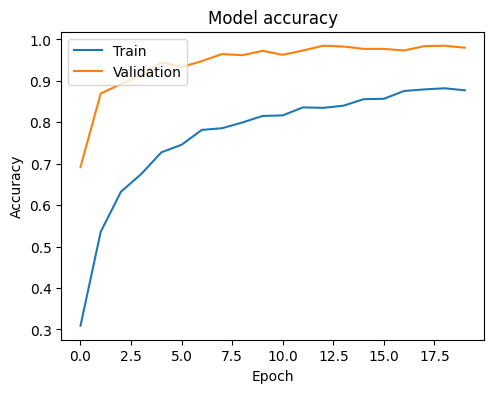

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

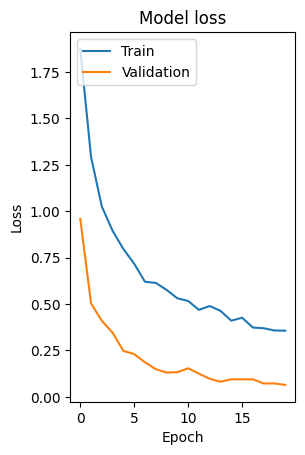

In [19]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=2)
print(f'Validation accuracy: {val_accuracy:.2f}')

33/33 - 10s - 318ms/step - accuracy: 0.9847 - loss: 0.0623
Validation accuracy: 0.98


In [21]:
def predict_single_image(img_path, model, classes):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Error loading image: {img_path}")
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return classes[predicted_class]

In [22]:
user_image_path = '/content/HandGesture/images/okay/1281.jpg'
try:
    predicted_class = predict_single_image(user_image_path, model, classes)
    print(f'Prediction for the user-provided image: {predicted_class}')
except ValueError as e:
    print(e)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Prediction for the user-provided image: okay
